# scikit-learnで手書き数字文字認識

In [1]:
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()
print(dir(digits))

['DESCR', 'data', 'images', 'target', 'target_names']


In [5]:
digits = datasets.load_digits()
print(digits.data)
print(digits.data.shape)
print(digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
(1797,)


In [9]:
print(len((digits.data[0])))
print((digits.data[0]))

64
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


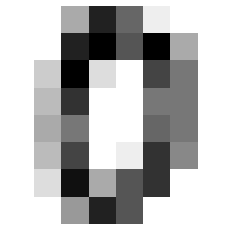

In [8]:
import numpy as np
# numpyのreshape()を使って8×8に戻す
img = np.reshape(digits.data[0], (8,8))

# cmapにより色を指定可能です。
# cmap=plt.cm.gray_rにより白黒で表現し、interpolationをnearestにすることで、最近傍補間という補完を行なっています。
# 最近傍補間とは、画像を拡大・縮小・回転した際に利用する補間法の1つです。
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
# plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

# 上記のcmap=の部分及び、interpolation=を消した下記でも動作します。比べてみてください。
# plt.imshow(image)

plt.axis('off')
plt.show()



In [10]:
num = len(digits.data)
print("num=" + str(num))

num=1797


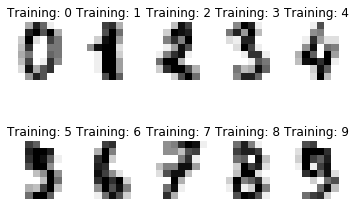

In [11]:
# zip()にて複数リストの値を同時に取得しています。
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

In [12]:
num = len(digits.data) # 1797
training_num = int(num*2/3) 
print("training_num=" + str(training_num))
print("training_num_type:" + str(type(training_num)))

training_num=1198
training_num_type:<class 'int'>


In [13]:
num = len(digits.data) # 1797
training_num = num*2//3 # num * 2//3とすればint()でのキャストは不要になります
print("training_num=" + str(training_num))
print("training_num_type:" + str(type(training_num)))

training_num=1198
training_num_type:<class 'int'>


In [14]:
#トレーニングデータの取得
train_data = digits.data[:training_num]
train_target = digits.target[:training_num]

#テストデータの取得
test_data = digits.data[training_num:]
test_target = digits.target[training_num:]

In [15]:
# SVMによるモデルを作成します
classifier = svm.SVC(gamma=0.001) # 引数の"gamma"というパラメータは、どれだけ複雑な決定境界を引くかのパラメータになっていますが、現時点で理解する必要はありません。

In [16]:
classifier.fit(train_data, train_target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
predicted = classifier.predict(test_data)

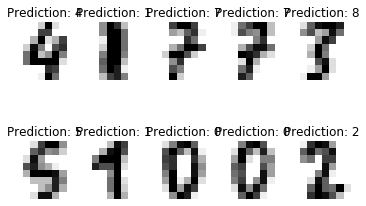

In [25]:
images_and_predictions = list(zip(digits.images[training_num:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

In [24]:
metrics.accuracy_score(test_target,predicted)

0.9632721202003339

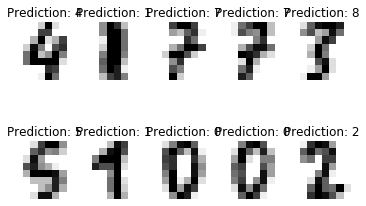

0.9632721202003339

In [20]:
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# 手書き数字データの読み込み
digits=datasets.load_digits()

num=len(digits.data)
training_num=int(num*2/3)

# print("training_num="+str(training_num))
# print("training_num_type:"+str(type(training_num)))

# データの分割
train_data=digits.data[:training_num]
train_target=digits.target[:training_num]
test_data=digits.data[training_num:]
test_target = digits.target[training_num:]

# サポートベクターマシンの定義
classifier=svm.SVC(gamma=0.001)
# サポートベクターマシンにて学習
classifier.fit(train_data,train_target)
# テストデータで予測
predicted=classifier.predict(test_data)
images_and_predictions = list(zip(digits.images[training_num:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()
# 正解率の確認
metrics.accuracy_score(test_target,predicted)